# Task #1 

Training an RBM to reconstruct the potential energy of moleculary Hydrogen as the distance between the H atoms changes.



In [1]:
# importing necessary library and classes
import numpy as np
import torch
import matplotlib.pyplot as plt

from RBM_helper import RBM

import H2_energy_calculator


# Training over all values of r

In [14]:
from glob import glob

coeff = np.loadtxt("H2_coefficients.txt")
data_set = []


n_vis = 2
n_hin = 10

epochs = 900 # number of training steps
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy

#loading all the data files
for file in glob("R_*.*_samples.txt"):
    r_data = []
    
    training_data = torch.from_numpy(np.loadtxt(file))
    r = float(file.split("_")[1])
    
    r_data.append(r)
    
    for i in range(len(coeff)):
        if coeff[i][0] == r:
            r_coeff = coeff[i,:]          
    
    true_E = H2_energy_calculator.energy_from_freq(training_data, r_coeff)
    r_data.append(true_E)
    
    #print("True Energies for r = {} : {}".format(r,true_E))
    
    rbm = RBM(n_vis, n_hin)
    # training of RBM
    for e in range(1, epochs+1):
        rbm.train(training_data, batch_size = 150, lr = 0.02 )# parameters that affect the performance of RBM
        
    init_state = torch.zeros(num_samples, n_vis)
    RBM_samples = rbm.draw_samples(30, init_state) # number of gibbs steps for eg 30
    
    energies = H2_energy_calculator.energy(RBM_samples, r_coeff, rbm.wavefunction)
    #print("RBM Engeries:", energies.item())
    
    r_data.append(energies.item())
    data_set.append(r_data)

In [15]:
data_set_1 = np.array(data_set)
data_set_1 = data_set_1[np.argsort(data_set_1[:,0])] #Sort the Array by the values of r

# Plotting the data

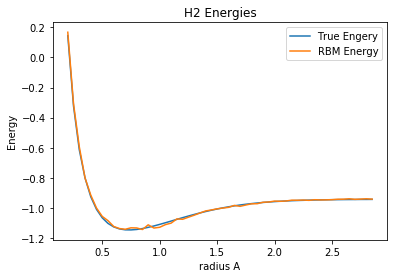

In [16]:
%matplotlib inline

r_values      = data_set_1[:,0]
true_Energies = data_set_1[:,1]
RBM_Energies  = data_set_1[:,2]

from matplotlib import pyplot as plt

plt.title("H2 Energies") 
plt.xlabel("radius A") 
plt.ylabel("Energy") 
plt.plot(r_values,true_Energies,label="True Engery") 
plt.plot(r_values,RBM_Energies,label="RBM Energy")
plt.legend(loc="upper right")
plt.show()

In [2]:
## T.Anandakkoomar , Sabhyata Gupta